In [1]:
import GWGen
from GWGen.Utils import *
from GWGen.WFGenerator import *
import matplotlib.pyplot as plt



# set initial parameters
M = 900000
m = 1e1
mu = 1e-17
e0 = 0.7
p0 = 8#GetInitialP(M,e0)
Phi_phi0 = 0.
Phi_theta0 =0.
Phi_r0 = 0.


a=0.6 #SMBH Spin
Y0=1. #Initial Inclincation
qS=np.pi/4 #Sky Location Polar Angle in solar system barycenter coordinate system
phiS=0. #Sky Location Azimuthal Angle in solar system barycenter coordinate system
qK=1e-6 #Initial BH Spin Polar Angle in solar system barycenter coordinate system
phiK=0. #Initial BH Spin Azimuthal Angle in solar system barycenter coordinate system
dist=1. #Distance to source (Mpc)
mich=False #assume LISA long baseline response approximation

T=1 #LISA data run is 5 years. We set the max time to be longer because the proca cloud extends the inspiral time
dt=15 #time resolution in seconds

alphaval = alphavalue(M,mu)
print(r"alpha = {0}".format(alphaval))
print("initial p = {0}".format(p0))


use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
insp_kwargs = {
    "npoints": 110,  # we want a densely sampled trajectory
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    "dense_output":True
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

WithoutProcaInspiralKwargs = insp_kwargs.copy()
WithoutProcaSumKwargs=sum_kwargs.copy()
withoutprocagen = EMRIWaveform(inspiral_kwargs=WithoutProcaInspiralKwargs, sum_kwargs=WithoutProcaSumKwargs, use_gpu=False)

alpha = 0.06734824255415002
initial p = 8


In [56]:
wv1 = withoutprocagen(M, m, a, p0, 0.7, Y0, qS, phiS, qK, phiK, dist,Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)
wv2 = withoutprocagen(M, m, a, p0, 0.71, Y0, qS, phiS, qK, phiK, dist,Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)
td = np.arange(len(wv2))*dt

/mnt/Data_Volume/Computer_Programs/Anaconda/envs/few_env/lib/python3.7/site-packages/few/summation/aakwave.py:228: UserWarning: Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6.
  "Inclination trajectory includes values within 1e-6 of the poles. We shift these values automatically away from poles by 1e-6."


In [57]:
WaveformInnerProduct(td, wv1,wv2)

NameError: name 'withoutproca1' is not defined

In [60]:
wv1f = np.fft.fft(wv1)
wv2f = np.fft.fft(wv2)
fd = np.fft.fftfreq(len(td),d=float(td[1]-td[0]))
fdlen = int(len(fd)/2-1)+2
fd = fd[1:fdlen]
wv1f = wv1f[1:fdlen]
wv2f = wv2f[1:fdlen]
wv2fstar = np.conjugate(wv2f)
psd = LisaSensitivity(fd)
integrand = wv1f*wv2fstar/psd


intfft = 4*np.real(np.fft.ifft(integrand))/(2*np.pi)
integral = 4*sp.integrate.simpson(integrand.real,x=fd)

print(intfft)
print(integral)

[ 0.7169321   0.31595714 -0.66648167 ... -0.13528116 -0.60229388
 -0.06824098]
0.15015383595727083


In [2]:
td = np.arange(0,10,0.01)
w1 = 10
T1=5
w2 = 0.5
T2=0.5
fun = lambda x,w,T: np.exp(-w*x**2)*np.exp(-1j*T*x**2)
h1 = fun(td,w1,T1)
h2 = fun(td,w2,T2)
h1f = np.fft.fft(h1)
h2fs = np.conjugate(np.fft.fft(h2))
freqs = np.fft.fftfreq(len(td))

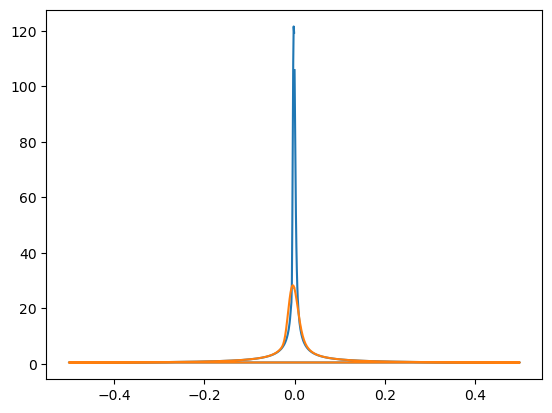

In [3]:
plt.plot(freqs,np.abs(h2fs))
plt.plot(freqs,np.abs(h1f))

In [52]:
print(np.real(np.trapz(h1f*h2fs, x=freqs)))
print(np.fft.ifft(h1f*h2fs).real[0])

22.89927023284276
26.18509715274479


In [53]:
1/np.sqrt(2*np.pi)

0.3989422804014327